In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from keras.layers.convolutional import Conv1D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',infer_datetime_format=True,low_memory=True)

In [ ]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [ ]:
df=pd.get_dummies(data=df, columns=['cbwd'])

In [ ]:
df['Date']=pd.to_datetime(df[['day','month','year','hour']])

In [ ]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,Date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,1.79,0,0,0,1,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,4.92,0,0,0,1,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,6.71,0,0,0,1,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,9.84,0,0,0,1,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,12.97,0,0,0,1,0,0,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0,2014-12-31 19:00:00
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0,2014-12-31 20:00:00
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0,2014-12-31 21:00:00
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0,2014-12-31 22:00:00


In [ ]:
df=df.drop(columns=['year','No','day','hour','month'])

In [ ]:
df

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,Date
0,NaN,-21,-11.0,1021.0,1.79,0,0,0,1,0,0,2010-01-01 00:00:00
1,NaN,-21,-12.0,1020.0,4.92,0,0,0,1,0,0,2010-01-01 01:00:00
2,NaN,-21,-11.0,1019.0,6.71,0,0,0,1,0,0,2010-01-01 02:00:00
3,NaN,-21,-14.0,1019.0,9.84,0,0,0,1,0,0,2010-01-01 03:00:00
4,NaN,-20,-12.0,1018.0,12.97,0,0,0,1,0,0,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0,2014-12-31 19:00:00
43820,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0,2014-12-31 20:00:00
43821,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0,2014-12-31 21:00:00
43822,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0,2014-12-31 22:00:00


In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
Date,,,,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,1.79,0,0,0,1,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,4.92,0,0,0,1,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,6.71,0,0,0,1,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,9.84,0,0,0,1,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,12.97,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0


In [ ]:
df=df.fillna(method='bfill')

In [ ]:
df.isna().sum()

pm2.5      0
DEWP       0
TEMP       0
PRES       0
Iws        0
Is         0
Ir         0
cbwd_NE    0
cbwd_NW    0
cbwd_SE    0
cbwd_cv    0
dtype: int64

In [ ]:
df.describe()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,98.722504,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916,0.114024,0.322882,0.348896,0.214198
std,91.415963,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867,0.317844,0.467584,0.476626,0.410269
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,138.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df=df.reset_index(drop=True)
df

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,129.0,-21,-11.0,1021.0,1.79,0,0,0,1,0,0
1,129.0,-21,-12.0,1020.0,4.92,0,0,0,1,0,0
2,129.0,-21,-11.0,1019.0,6.71,0,0,0,1,0,0
3,129.0,-21,-14.0,1019.0,9.84,0,0,0,1,0,0
4,129.0,-20,-12.0,1018.0,12.97,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
43820,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
43821,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0
43822,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0


In [ ]:
df=df.drop(columns=['TEMP'])

In [ ]:
df

,pm2.5,DEWP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,129.0,-21,1021.0,1.79,0,0,0,1,0,0
1,129.0,-21,1020.0,4.92,0,0,0,1,0,0
2,129.0,-21,1019.0,6.71,0,0,0,1,0,0
3,129.0,-21,1019.0,9.84,0,0,0,1,0,0
4,129.0,-20,1018.0,12.97,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,1034.0,231.97,0,0,0,1,0,0
43820,10.0,-22,1034.0,237.78,0,0,0,1,0,0
43821,10.0,-22,1034.0,242.70,0,0,0,1,0,0
43822,8.0,-22,1034.0,246.72,0,0,0,1,0,0


# Splitting

In [ ]:
def traintest_split(dataset):
    x=35064
    train_data=dataset[:x]
    test_data=dataset[x:]
    return train_data,test_data

In [ ]:
print("Time-series hourly data")
train_data,test_data=traintest_split(df)
print(train_data.shape)
print(test_data.shape)

Time-series hourly data
(35064, 10)
(8760, 10)


# **Scaling**

In [ ]:
def scaling(train,test):
  scaler=MinMaxScaler(feature_range=(0,1))
  a=scaler.fit_transform(train)
  b=scaler.transform(test)
  return a,b

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
a=scaler.fit_transform(train_data)
b=scaler.transform(test_data)

In [ ]:
scaled_train_data,scaled_test_data=scaling(train_data,test_data)

In [ ]:
print(scaled_train_data.shape)
print(scaled_test_data.shape)

(35064, 10)
(8760, 10)


# **Supervised Form**

In [ ]:
def series_to_supervised(dataset,look_back,horizon):
  x=[]
  y=[]
  for i in range(len(dataset)):
    # find the end of this pattern
    end_ix = i + look_back
    # check if we are beyond the dataset
    if end_ix > len(dataset)-horizon:
      break
    # gather input and output parts of the pattern
    data_x, data_y = dataset[i:end_ix,0:], dataset[end_ix:end_ix+horizon,0]
    x.append(data_x)
    y.append(data_y)
  return np.array(x), np.array(y)

In [ ]:
horizon=12
x_train1,y_train1=series_to_supervised(scaled_train_data,12,horizon)
x_test1,y_test1=series_to_supervised(scaled_test_data,12,horizon)

In [ ]:
x_train1= np.reshape(x_train1, (x_train1.shape[0],x_train1.shape[1],10))
x_test1= np.reshape(x_test1, (x_test1.shape[0],x_test1.shape[1],10))

In [ ]:
print("x_train  " + str(x_train1.shape))
print("y_train  " + str(y_train1.shape))
print("x_test  " + str(x_test1.shape))
print("y_test  " + str(y_test1.shape))

x_train  (35041, 12, 10)
y_train  (35041, 12)
x_test  (8737, 12, 10)
y_test  (8737, 12)


# **Loss Graph Function**

In [ ]:
def loss_graph(history):
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']
  epochs = range(1,(len(loss_train))+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

# Proposed Method

In [ ]:
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=4,activation='relu', input_shape=(12, 10)))
model1.add(Conv1D(filters=16, kernel_size=2,activation='relu'))
model1.add(LSTM(16,activation='tanh',return_sequences=True)) 
model1.add(LSTM(8,activation='tanh',return_sequences=True))
model1.add(LSTM(4,activation='tanh')) 
model1.add(Dense(1))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt,loss='mse')

In [ ]:
es=EarlyStopping(monitor='val_loss',patience=5,verbose=1)

In [ ]:
history1=model1.fit(x_train1, y_train1[:,11], epochs=50,batch_size=32,validation_data=(x_test1,y_test1[:,11]),callbacks=[es])

Epoch 1/50
1096/1096 [==============================] - 45s 8ms/step - loss: 0.0093 - val_loss: 0.0066
Epoch 2/50
1096/1096 [==============================] - 7s 7ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 3/50
1096/1096 [==============================] - 7s 7ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 4/50
1096/1096 [==============================] - 8s 7ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 5/50
1096/1096 [==============================] - 8s 7ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 6/50
1096/1096 [==============================] - 8s 7ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 7/50
1096/1096 [==============================] - 8s 7ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 8/50
1096/1096 [==============================] - 7s 7ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 9/50
1096/1096 [==============================] - 7s 7ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 10/50
1096/1096 [==============================] - 7s 7ms/step - loss: 0.00

### **Loss Graph**

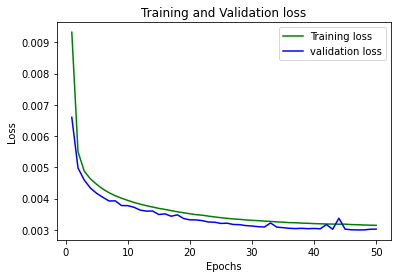

In [ ]:
loss_graph(history1)

# Train

In [ ]:
y_pred_train=model1.predict(x_train1)

In [ ]:
forecast_copies = np.repeat(y_pred_train[:,11].reshape(-1,1), x_train1.shape[2], axis=-1)
y_pred_train = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
df_train_predicted=pd.DataFrame(data=y_pred_train, columns=['Predicted_train'])

In [ ]:
actual_copies = np.repeat(y_train1[:,11].reshape(-1,1), x_train1.shape[2], axis=-1)
y_actual_train = scaler.inverse_transform(actual_copies)[:,0]

In [ ]:
df_train_actual=pd.DataFrame(data=y_actual_train ,columns=['Actual_train'])
df_train_actual

,Actual_train
0,129.0
1,129.0
2,148.0
3,159.0
4,181.0
...,...
35036,22.0
35037,18.0
35038,23.0
35039,20.0


In [ ]:
df1=pd.concat([df_train_actual,df_train_predicted],axis=1)
df1

,Actual_train,Predicted_train
0,129.0,120.584846
1,129.0,118.952324
2,148.0,120.327774
3,159.0,122.043060
4,181.0,141.647964
...,...,...
35036,22.0,44.438118
35037,18.0,48.957958
35038,23.0,45.095600
35039,20.0,42.604431


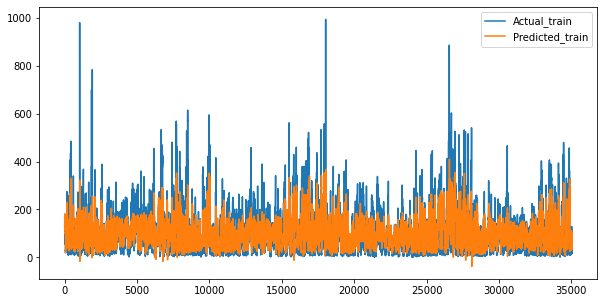

In [ ]:
df1.plot(figsize=(10,5))

In [ ]:
import math
trainScore = math.sqrt(mean_squared_error(df1['Actual_train'],df1['Predicted_train']))
print('Train Score: %.5f RMSE' % (trainScore))
trainScore1 =mean_squared_error(df1['Actual_train'],df1['Predicted_train'])
print('Train Score: %.5f MSE' % (trainScore1))

Train Score: 70.15910 RMSE
Train Score: 4922.29978 MSE


# Test

In [ ]:
y_pred_test=model1.predict(x_test1)

In [ ]:
forecast_copies = np.repeat(y_pred_test[:,11].reshape(-1,1), x_test1.shape[2], axis=-1)
y_pred_test = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
df_test_predicted=pd.DataFrame(data=y_pred_test, columns=['Predicted'])

In [ ]:
actual_copies = np.repeat(y_test1[:,11].reshape(-1,1), x_test1.shape[2], axis=-1)
y_actual_test = scaler.inverse_transform(actual_copies)[:,0]

In [ ]:
df_test_actual=pd.DataFrame(data=y_actual_test ,columns=['Actual'])
df_test_actual

,Actual
0,111.0
1,144.0
2,170.0
3,174.0
4,174.0
...,...
8732,8.0
8733,10.0
8734,10.0
8735,8.0


In [ ]:
df2=pd.concat([df_test_actual,df_test_predicted],axis=1)
df2

,Actual,Predicted
0,111.0,41.638660
1,144.0,37.855293
2,170.0,41.042099
3,174.0,35.976856
4,174.0,36.459156
...,...,...
8732,8.0,16.011032
8733,10.0,16.301140
8734,10.0,17.524124
8735,8.0,18.309763


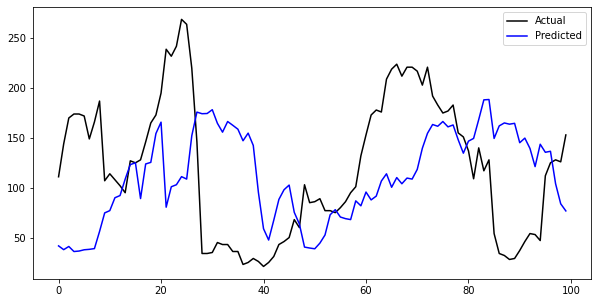

In [ ]:
df2['Actual'][:100].plot(figsize=(10,5),c='black',label='Actual')
df2['Predicted'][:100].plot(figsize=(10,5),c='blue',label='Predicted')
plt.legend()
plt.show()

In [ ]:
import math
testScore = math.sqrt(mean_squared_error(df2['Actual'],df2['Predicted']))
print('Test Score: %.5f RMSE' % (testScore))
testScore1 =mean_squared_error(df2['Actual'],df2['Predicted'])
print('Test Score: %.5f MSE' % (testScore1))

Test Score: 70.06769 RMSE
Test Score: 4909.48172 MSE


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
import math
testScore2 = mean_absolute_error(df2['Actual'],df2['Predicted'])
print('Train Score: %.2f MAE' % (testScore2))

Train Score: 48.93 MAE
